# Build your Notes - Finally!

### Make sure you have already seen the previous videos. 

###### *Images from WIKIPEDIA

## Remember the last formula we read - Frequency vs n_th key

In [79]:
import numpy as np

In [3]:
# This gives us the n_th key on a Grand Piano for a given frequency
# Base frequqncy = 440 ('A4'). [Now you understand A4 ;)]
# n+1 used instead of n because the key indexing starts from 1 and not 0

def get_frequency(n, base_freq = 440):
    return 2 ** (((n+1) - 49) / 12 ) * base_freq

## Let's keep a Piano on the screen
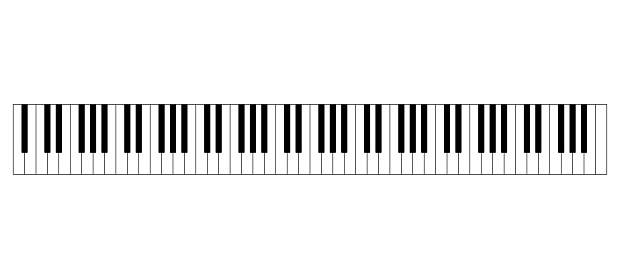

#### There are total 88 Keys and 8 Octaves in a Grand Piano. Starting at 'A0' and Ending at 'C8'

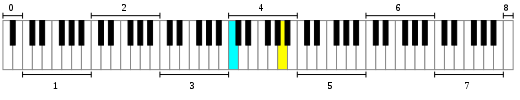

### Now let's use the above formula to build a Dictionary to store the mapping of there 88 Keys with their respective frequencies


In [28]:
# Now let's use the above formula to build a Dictionary to store the mapping of there 88 Keys with their respective frequencies
# No Note will be called ''

def get_key_frequency_mapping(base_freq = 440):
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    keys_with_octaves = np.array([n + str(i) for i in range(8+1) for n in notes]) # 8 + 1 such that we have 8 indexes
    start_note = np.where(keys_with_octaves == 'A0')[0][0]
    end_note = np.where(keys_with_octaves == 'C8')[0][0]    
    
    keys = keys_with_octaves[start_note:end_note + 1] # 88 Keys
    
    note_dict = dict(zip(keys, [get_frequency(n, base_freq = base_freq) for n in range(len(keys))]))
    note_dict[''] = 0 # No Note
    return note_dict

In [29]:
get_key_frequency_mapping()

{'A0': 27.5,
 'A#0': 29.13523509488062,
 'B0': 30.86770632850775,
 'C1': 32.70319566257483,
 'C#1': 34.64782887210901,
 'D1': 36.70809598967594,
 'D#1': 38.890872965260115,
 'E1': 41.20344461410875,
 'F1': 43.653528929125486,
 'F#1': 46.2493028389543,
 'G1': 48.999429497718666,
 'G#1': 51.91308719749314,
 'A1': 55.0,
 'A#1': 58.27047018976124,
 'B1': 61.7354126570155,
 'C2': 65.40639132514966,
 'C#2': 69.29565774421802,
 'D2': 73.41619197935188,
 'D#2': 77.78174593052023,
 'E2': 82.4068892282175,
 'F2': 87.30705785825097,
 'F#2': 92.4986056779086,
 'G2': 97.99885899543733,
 'G#2': 103.82617439498628,
 'A2': 110.0,
 'A#2': 116.54094037952248,
 'B2': 123.47082531403103,
 'C3': 130.8127826502993,
 'C#3': 138.59131548843604,
 'D3': 146.8323839587038,
 'D#3': 155.56349186104046,
 'E3': 164.81377845643496,
 'F3': 174.61411571650194,
 'F#3': 184.9972113558172,
 'G3': 195.99771799087463,
 'G#3': 207.65234878997256,
 'A3': 220.0,
 'A#3': 233.08188075904496,
 'B3': 246.94165062806206,
 'C4': 261

## Now let's build our Sine Wave function
#### Visual
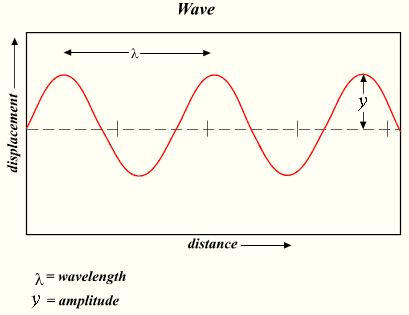
#### Wave Equation


### This takes in the following things:
    1. Frequency of the Wave
    2. Duration for which the wave will exist
    3. Sample Rate (default = 44.1 KHz)
    4. Amplitude of the wave (default = 4096)

In [49]:
def sine_note(freq, duration, sample_rate = 44100, A = 4096):
    t = np.linspace(0, duration, int(sample_rate * duration)) # Time Axis
    note = A * np.sin(2 * np.pi * freq * t)
    return note

## We are almost done!!!  
### Now let's bring everthing together

In [69]:
keys = get_key_frequency_mapping()
def note_out(key, duration=1, amplitude = 3064):
    if key not in keys.keys():
        print(f"{key} is not a valid key. Please enter one the following {keys.keys()}")
        return
    else:
        freq = keys[key]
        return sine_note(freq, duration = duration, A = amplitude)

## Now let's listen to our Notes!

In [76]:
import IPython.display as ipd  # Use this to play Waves on Jupyter Notebook

# C note

ipd.Audio(note_out('C4'), rate=44100, autoplay=True) 

In [77]:
# C Major Scale

my_wave = np.hstack((note_out('C4', duration = 0.5), note_out('D4', duration = 0.5),note_out('E4', duration = 0.5),note_out('F4', duration = 0.5),note_out('G4', duration = 0.5),note_out('A4', duration = 0.5),note_out('B4', duration = 0.5),note_out('C5', duration = 0.5) ))
ipd.Audio(my_wave, rate=44100, autoplay=True) 

In [88]:
# C Major Chords

my_wave = note_out('C4', duration = 1) + note_out('E4', duration = 1) + note_out('G4', duration = 1)
ipd.Audio(my_wave, rate=44100, autoplay=True) 

# Extras!

In [96]:
# Let's make things even more cool!

def get_chord(note_arr, duration = 1):
    w = note_out(note_arr[0], duration = duration)
    for i in range(1, len(note_arr)):
        w += note_out(note_arr[i], duration = duration)
    return w
# Am, F, E
my_wave = np.hstack((get_chord(['A4', 'C4', 'E4'], duration = 4),  get_chord(['F4', 'A4', 'C4'], duration = 2), get_chord(['E4', 'G#4', 'B4'], duration = 2)))
ipd.Audio(my_wave, rate=44100, autoplay=True) 